In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

num_of_samples = 5000


def fill_nas(df):
  df["MinTemp"] = df["MinTemp"].fillna(df["MinTemp"].mean())
  df["MaxTemp"] = df["MaxTemp"].fillna(df["MaxTemp"].mean())
  df["Evaporation"] = df["Evaporation"].fillna(df["Evaporation"].mean())
  df["Sunshine"] = df["Sunshine"].fillna(df["Sunshine"].mean())
  df["WindGustSpeed"] = df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
  df["Rainfall"] = df["Rainfall"].fillna(df["Rainfall"].mean())
  df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
  df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
  df["Humidity9am"] = df["Humidity9am"].fillna(df["Humidity9am"].mean())
  df["Humidity3pm"] = df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
  df["Pressure9am"] = df["Pressure9am"].fillna(df["Pressure9am"].mean())
  df["Pressure3pm"] = df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
  df["Cloud9am"] = df["Cloud9am"].fillna(df["Cloud9am"].mean())
  df["Cloud3pm"] = df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
  df["Temp9am"] = df["Temp9am"].fillna(df["Temp9am"].mean())
  df["Temp3pm"] = df["Temp3pm"].fillna(df["Temp3pm"].mean())

  df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
  df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
  df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
  df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
  df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
  return df


def plot_correlation(df):
  plt.figure(figsize=(18, 12))
  sns.heatmap(df.corr(), annot=True)
  plt.xticks(rotation=90)
  plt.show()



df = pd.read_csv('./weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

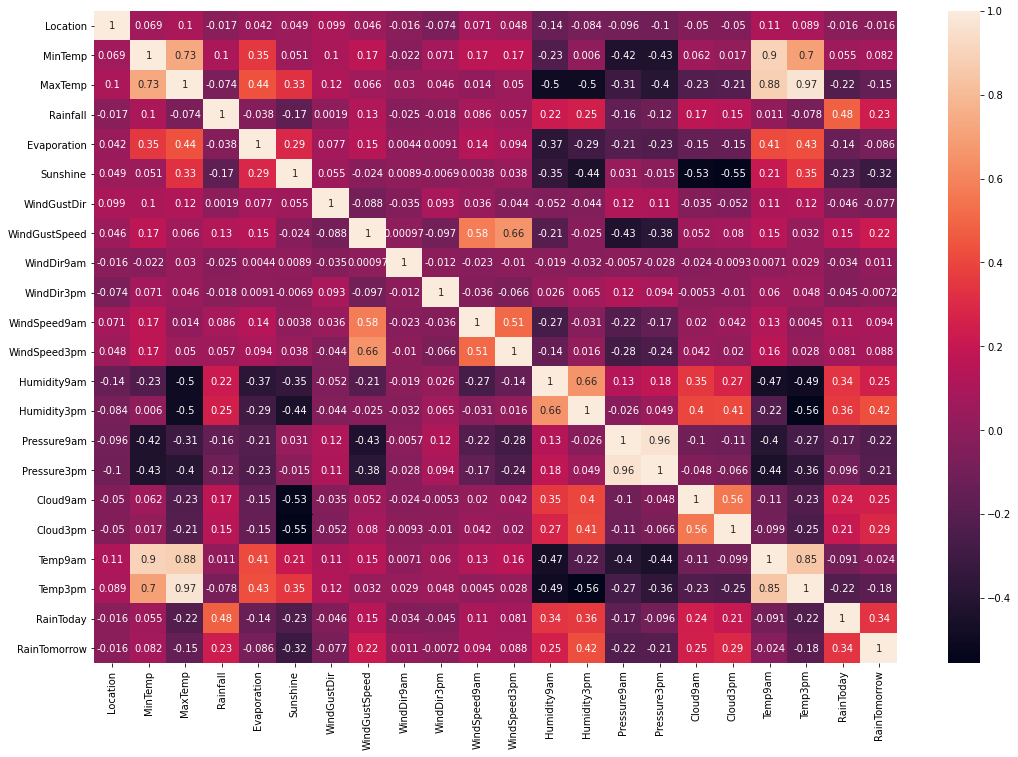

In [9]:

# change Rain to 0, 1 value
df['RainToday'] = [int(x != 'No') for x in df['RainToday']]
df['RainTomorrow'] = [int(x != 'No') for x in df['RainTomorrow']]

# fill missing values
df = fill_nas(df)

# change location and wind directions to numerical values
location_dict = {name: c for c, name in enumerate(df['Location'].unique())}
wind_dir_9 = {name: c for c, name in enumerate(df['WindDir9am'].unique())}
wind_dir_3 = {name: c for c, name in enumerate(df['WindDir3pm'].unique())}
wind_dir_gust = {name: c for c, name in enumerate(df['WindGustDir'].unique())}
df['Location'] = [location_dict[x] for x in df['Location']]
df['WindDir9am'] = [wind_dir_9[x] for x in df['WindDir9am']]
df['WindDir3pm'] = [wind_dir_3[x] for x in df['WindDir3pm']]
df['WindGustDir'] = [wind_dir_gust[x] for x in df['WindGustDir']]


plot_correlation(df)

In [10]:
df = df.drop(['Temp3pm', 'Temp9am', 'Humidity9am', "Date"], axis=1)

df.dropna(inplace=True)

df = df.sample(n=num_of_samples)
y = df['RainTomorrow']
del df['RainTomorrow']

X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
from preprocess_data import preprocessed_data
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from scipy.stats.distributions import uniform

import pandas as pd
import warnings

warnings.filterwarnings('ignore')

seed = 123
kfold = StratifiedKFold(n_splits=4, random_state=seed)

In [12]:
def LR_gridsearch():
  param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

  grid = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)

  grid.fit(X_train, y_train)
  print("LR", grid.best_params_)
  return grid


def svm_gridsearch():
  param_distribution = {
    'C': uniform(0.001, 0.1 - 0.001),
    'gamma': uniform(0.0001, 2)
  }
  grid = RandomizedSearchCV(SVC(kernel='rbf'), param_distribution, random_state=0)
  grid.fit(X_train, y_train)
  print("SVC", grid.best_params_)
  return grid

In [13]:
model_lr = LR_gridsearch()

LR {'C': 0.01}


In [14]:
model_svm = svm_gridsearch()

SVC {'C': 0.055332536888805156, 'gamma': 1.430478732744839}


In [15]:
models = []
models.append(('LR', model_lr))
models.append(('SVM', model_svm))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
  print(name)
  print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
  print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test), average='micro')))
  print("f1_score: {}".format(metrics.f1_score(y_test, model.predict(X_test), average='micro')))
  print("accuracy_score: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))
  precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='micro'))
  recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='micro'))
  f1_score.append(metrics.f1_score(y_test, model.predict(X_test), average='micro'))
  accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

LR
precision_score: 0.813
recall_score: 0.813
f1_score: 0.813
accuracy_score: 0.813
SVM
precision_score: 0.735
recall_score: 0.735
f1_score: 0.735
accuracy_score: 0.735


In [16]:
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score': accuracy_score
     }
df = pd.DataFrame(data=d, index=[0, 1])
df.insert(loc=0, column='Method', value=['LR', 'SVM'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,LR,0.813,0.813,0.813,0.813
1,SVM,0.735,0.735,0.735,0.735


In [17]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from preprocess_data import preprocessed_data
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics

import pandas as pd
import warnings

warnings.filterwarnings('ignore')

seed = 123
kfold = StratifiedKFold(n_splits=4, random_state=seed)

In [18]:
def KNN():
  pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_neighbors': [1, 2, 3, 5, 10, 100]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("KNN", grid.best_params_)
  return grid


def decision_tree_clasifier():
  pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier(random_state=0))])
  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__max_depth': [1, 2, 5, 10, 100],
    'classifier__min_samples_leaf': [1, 2, 4, 10]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("Decision tree clasifier", grid.best_params_)
  return grid


def bagging():
  pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42))])

  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_samples': [50, 100, 200]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("Bagging", grid.best_params_)
  return grid


def random_forrest():
  pipe = Pipeline(
    [('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42))])
  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_leaf_nodes': [4, 8, 16, 64]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("RF", grid.best_params_)
  return grid


def extra_trees():
  pipe = Pipeline(
    [('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42))])
  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__max_leaf_nodes': [4, 8, 16, 64]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("ET", grid.best_params_)
  return grid


def ada_boost():
  pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=1, learning_rate=0.5,
    algorithm="SAMME.R", random_state=42))])

  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 0.9]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("ADA", grid.best_params_)
  return grid


def gradient_boost():
  pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier(random_state=42))])
  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 0.9]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("GB", grid.best_params_)
  return grid


def xboost_clf():
  pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', XGBClassifier())])
  param_grid = {
    'preprocessing': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_estimators': [50, 100, 500, 1000],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 0.9]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
  grid.fit(X_train, y_train)
  print("XGB", grid.best_params_)
  return grid

In [19]:
knn = KNN()

KNN {'classifier__n_neighbors': 10, 'preprocessing': None}


In [20]:
dt_clf = decision_tree_clasifier()

Decision tree clasifier {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'preprocessing': StandardScaler()}


In [21]:
bag_clf = bagging()

Bagging {'classifier__max_samples': 200, 'classifier__n_estimators': 500, 'preprocessing': MinMaxScaler()}


In [22]:
rf_clf = random_forrest()

RF {'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 1000, 'preprocessing': MinMaxScaler()}


In [23]:
et_clf = extra_trees()

ET {'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 50, 'preprocessing': MinMaxScaler()}


In [24]:
ada_clf = ada_boost()

ADA {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 1000, 'preprocessing': None}


In [25]:
gb_clf = gradient_boost()

GB {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 1000, 'preprocessing': MinMaxScaler()}


In [26]:
xgb_clf = xboost_clf()

[23:05:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [27]:
models = []
models.append(('KNN', knn.best_estimator_))
models.append(('DecisionTreeClassifier', dt_clf.best_estimator_))
models.append(('BaggingClassifier', bag_clf.best_estimator_))
models.append(('RandomForestClassifier', rf_clf.best_estimator_))
models.append(('ExtraTreesClassifier', et_clf.best_estimator_))
models.append(('AdaBoostClassifier', ada_clf.best_estimator_))
models.append(('GradientBoostingClassifier', gb_clf.best_estimator_))
models.append(('XGBClassifier', xgb_clf.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
  print(name)
  print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test))))
  print("recall_score: {}".format(metrics.recall_score(y_test, model.predict(X_test))))
  print("f1_score: {}".format(metrics.f1_score(y_test, model.predict(X_test))))
  print("accuracy_score: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))

  if (name == 'SVM linear' or name == 'SVM rbf' or name == 'voting_clf'):
    print("roc_auc_score: {}".format(metrics.roc_auc_score(y_test, model.decision_function(X_test))))
  else:
    print("roc_auc_score: {}".format(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])))

  precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
  recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
  f1_score.append(metrics.f1_score(y_test, model.predict(X_test)))
  accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
  if (name == 'SVM linear' or name == 'SVM rbf' or name == 'voting_clf'):
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.decision_function(X_test)))
  else:
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

KNN
precision_score: 0.7910447761194029
recall_score: 0.4
f1_score: 0.531328320802005
accuracy_score: 0.813
roc_auc_score: 0.8126479270953665
DecisionTreeClassifier
precision_score: 0.6338028169014085
recall_score: 0.5094339622641509
f1_score: 0.5648535564853556
accuracy_score: 0.792
roc_auc_score: 0.7878269798485431
BaggingClassifier
precision_score: 0.7660818713450293
recall_score: 0.49433962264150944
f1_score: 0.6009174311926605
accuracy_score: 0.826
roc_auc_score: 0.8371171864972404
RandomForestClassifier
precision_score: 0.8141025641025641
recall_score: 0.47924528301886793
f1_score: 0.6033254156769596
accuracy_score: 0.833
roc_auc_score: 0.851022975227827
ExtraTreesClassifier
precision_score: 0.781021897810219
recall_score: 0.4037735849056604
f1_score: 0.5323383084577115
accuracy_score: 0.812
roc_auc_score: 0.8406777050442819
AdaBoostClassifier
precision_score: 0.7931034482758621
recall_score: 0.5207547169811321
f1_score: 0.6287015945330297
accuracy_score: 0.837
roc_auc_score: 0.8

In [28]:
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score': accuracy_score,
     'roc_auc_score': roc_auc_score
     }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method',
          value=['KNN', 'DecisionTreeClassifier', 'BaggingClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
                 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,KNN,0.791045,0.400000,0.531328,0.813,0.812648
1,DecisionTreeClassifier,0.633803,0.509434,0.564854,0.792,0.787827
2,BaggingClassifier,0.766082,0.494340,0.600917,0.826,0.837117
3,RandomForestClassifier,0.814103,0.479245,0.603325,0.833,0.851023
4,ExtraTreesClassifier,0.781022,0.403774,0.532338,0.812,0.840678
5,AdaBoostClassifier,0.793103,0.520755,0.628702,0.837,0.852502
6,GradientBoostingClassifier,0.789773,0.524528,0.630385,0.837,0.864906
7,XGBClassifier,0.778409,0.516981,0.621315,0.833,0.865055


In [29]:
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.python.keras.backend import clear_session
from tensorflow.python.keras.callbacks import History
from tensorflow.python.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.regularizers import l1

warnings.filterwarnings('ignore')

In [30]:
def plot_history(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()



clear_session()

model = Sequential()
model.add(Dense(10, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 12,275
Trainable params: 12,275
Non-trainable params: 0
____________________________________________________

In [32]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 0.5974 - accuracy: 0.7072 - val_loss: 0.5783 - val_accuracy: 0.7350
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7598 - val_loss: 0.5794 - val_accuracy: 0.7350
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7598 - val_loss: 0.5794 - val_accu

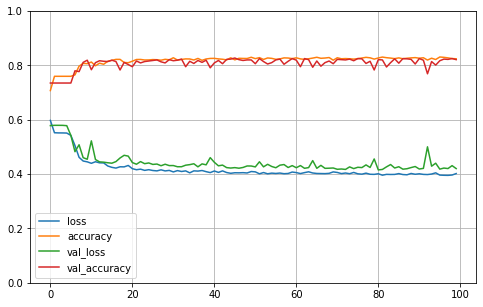

In [33]:
plot_history(history)

In [34]:
print("BASIC MODEL:", model.evaluate(X_test, y_test))

32/32 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8210
BASIC MODEL: [0.4202269911766052, 0.8209999799728394]


In [35]:
clear_session()

history = History()
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],), activity_regularizer=l1(0.00001)))
model.add(Dense(64, activation="sigmoid", activity_regularizer=l1(0.00001)))
model.add(Dense(32, activation="sigmoid", activity_regularizer=l1(0.00001)))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 13,109
Trainable params: 13,109
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[history])

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 0.6834 - accuracy: 0.6572 - val_loss: 0.5981 - val_accuracy: 0.7350
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7598 - val_loss: 0.5386 - val_accuracy: 0.7350
Epoch 3/100
125/125 [=========================

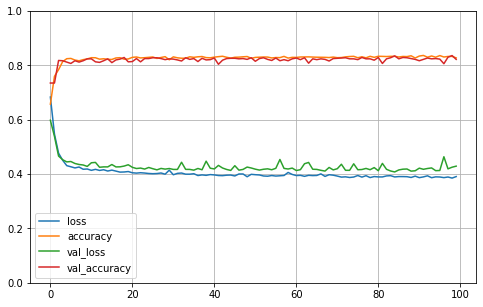

In [37]:
plot_history(history)

In [38]:
print("BASIC MODEL WITH OPTIMIZER:", model.evaluate(X_test, y_test))

32/32 [==============================] - 0s 829us/step - loss: 0.4292 - accuracy: 0.8220
BASIC MODEL WITH OPTIMIZER: [0.4291624426841736, 0.8220000267028809]


In [39]:
clear_session()

model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],)))
model.add(Activation(activation='LeakyReLU'))
model.add(BatchNormalization())

model.add(Dense(128))
model.add(Activation(activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation(activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation(activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation(activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation(activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation(activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='LeakyReLU'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [40]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
125/125 [==============================] - 3s 6ms/step - loss: 4.8599 - accuracy: 0.5665 - val_loss: 4.0876 - val_accuracy: 0.7350
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 4.5617 - accuracy: 0.5943 - val_loss: 1.4859 - val_accuracy: 0.7000

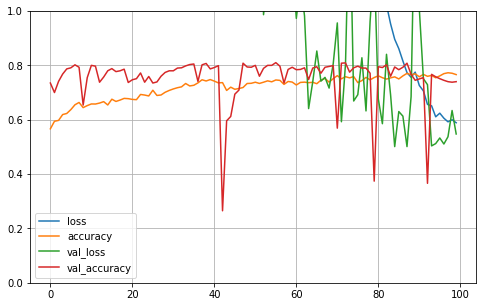

In [42]:
plot_history(history)

In [43]:
print("COMPLEX MODEL:", model.evaluate(X_test, y_test))

32/32 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7400
COMPLEX MODEL: [0.5475103855133057, 0.7400000095367432]
